Importing plotly failed. Interactive plots will not work.
17:30:53 - cmdstanpy - INFO - Chain [1] start processing
17:31:53 - cmdstanpy - INFO - Chain [1] done processing


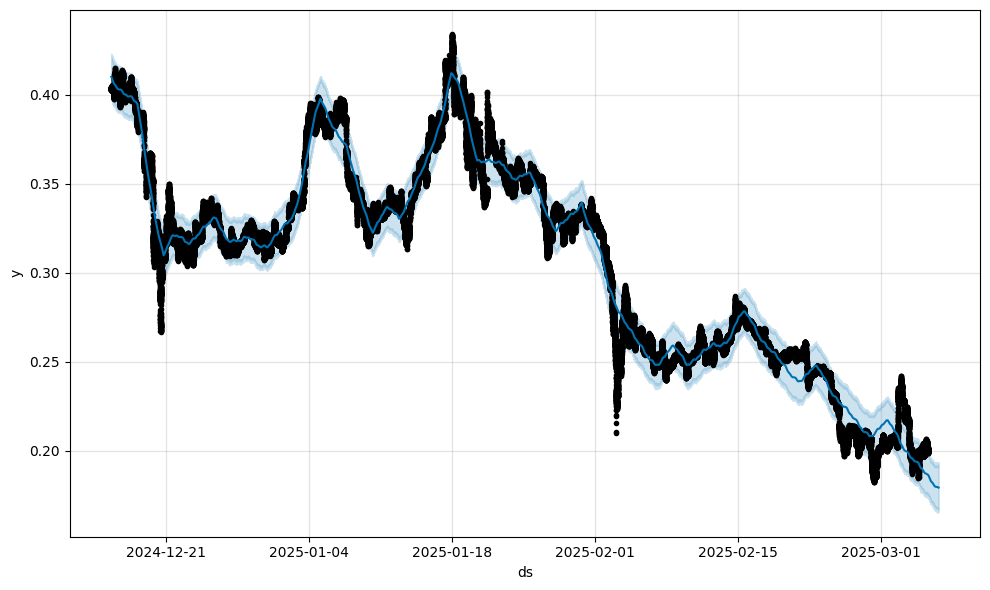

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv("merged_kline.csv")

# 预处理数据
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.rename(columns={"timestamp": "ds", "close": "y"})

# 训练 Prophet 模型
model = Prophet()
model.fit(df[["ds", "y"]])

# 生成未来预测时间
future = model.make_future_dataframe(periods=1440, freq="min")  # 预测未来一天（1440分钟）

# 进行预测
forecast = model.predict(future)

# 画图展示预测结果
fig = model.plot(forecast)
plt.show()


17:34:58 - cmdstanpy - INFO - Chain [1] start processing
17:35:54 - cmdstanpy - INFO - Chain [1] done processing


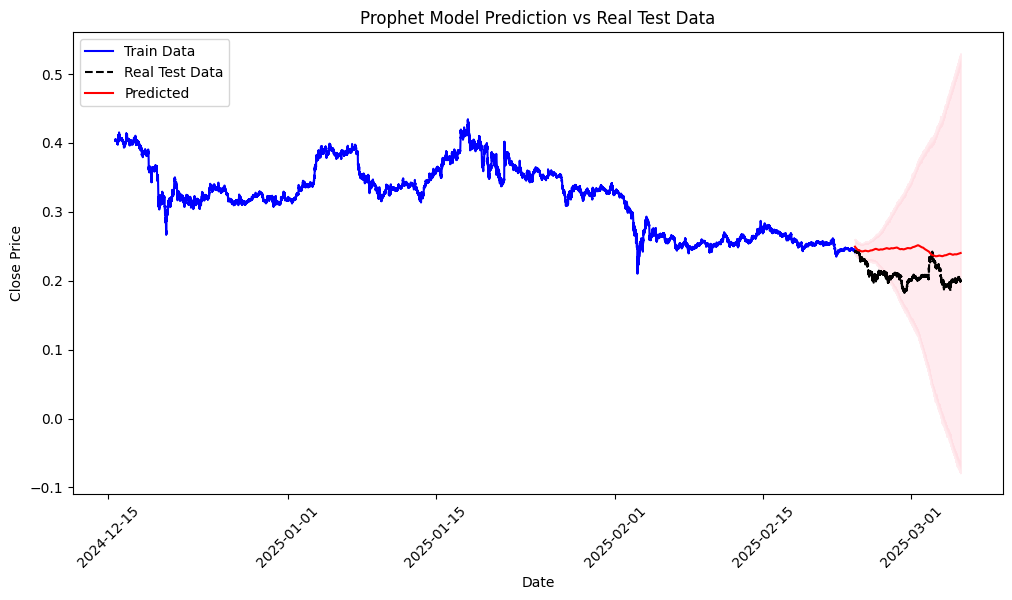

                        ds        y  predicted
100800 2025-02-23 16:00:00  0.24109   0.249275
100801 2025-02-23 16:01:00  0.24145   0.249263
100802 2025-02-23 16:02:00  0.24172   0.249252
100803 2025-02-23 16:03:00  0.24191   0.249240
100804 2025-02-23 16:04:00  0.24178   0.249228
...                    ...      ...        ...
115195 2025-03-05 15:55:00  0.20024   0.240157
115196 2025-03-05 15:56:00  0.20011   0.240156
115197 2025-03-05 15:57:00  0.20001   0.240155
115198 2025-03-05 15:58:00  0.20016   0.240154
115199 2025-03-05 15:59:00  0.19987   0.240153

[14400 rows x 3 columns]


In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv("merged_kline.csv")

# 预处理数据
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.rename(columns={"timestamp": "ds", "close": "y"})

# 划分训练集和测试集（最后10天数据用于测试）
cutoff_date = df["ds"].max() - pd.Timedelta(days=10)
train_df = df[df["ds"] <= cutoff_date]
test_df = df[df["ds"] > cutoff_date]

# 训练 Prophet 模型
model = Prophet()
model.fit(train_df[["ds", "y"]])

# 生成测试集对应的未来时间
future = test_df[["ds"]]

# 进行预测
forecast = model.predict(future)

# 画出预测结果对比真实数据
plt.figure(figsize=(12, 6))
plt.plot(train_df["ds"], train_df["y"], label="Train Data", color="blue")
plt.plot(test_df["ds"], test_df["y"], label="Real Test Data", color="black", linestyle="dashed")
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted", color="red")

# 画置信区间
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], color="pink", alpha=0.3)

plt.legend()
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Prophet Model Prediction vs Real Test Data")
plt.xticks(rotation=45)
plt.show()

# 打印预测结果和真实数据对比
result = test_df[["ds", "y"]].copy()
result["predicted"] = forecast["yhat"].values
print(result)
